# <center><font color='Yellow'> PUBG Game Prediction </font></center>

### Table content 

## Importing Libraries :

In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

## loading the Data:

In [2]:
df=pd.read_csv("PUBG_Game_Prediction_data.csv")

In [3]:
# glimpse of the data:
df.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400


In [4]:
#data dimension:
df.shape

(4446966, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Descriptation:

### Data Description

1. **DBNOs** - Number of enemy players knocked.
2. **assists** - Number of enemy players this player damaged that were killed by teammates.
3. **boosts** - Number of boost items used.
4. **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
5. **headshotKills** - Number of enemy players killed with headshots.
6. **heals** - Number of healing items used.
7. **Id** - Player’s Id.
8. **killPlace** - Ranking in match of number of enemy players killed.
9. **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10. **killStreaks** - Max number of enemy players killed in a short amount of time.
11. **kills** - Number of enemy players killed.
12. **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
13. **matchDuration** - Duration of match in seconds.
14. **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
15. **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16. **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
17. **revives** - Number of times this player revived teammates.
18. **rideDistance** - Total distance traveled in vehicles measured in meters.
19. **roadKills** - Number of kills while in a vehicle.
20. **swimDistance** - Total distance traveled by swimming measured in meters.
21. **teamKills** - Number of times this player killed a teammate.
22. **vehicleDestroys** - Number of vehicles destroyed.
23. **walkDistance** - Total distance traveled on foot measured in meters.
24. **weaponsAcquired** - Number of weapons picked up.
25. **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. **numGroups** - Number of groups we have data for in the match.
28. **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
29. **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


## data wrangling: 

### Check the rows with  any null values in the winPlacePerc col:


In [6]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# drop that column:
df.drop(2744604,inplace=True)

In [8]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


### Create a new feature to see how many players joined in each particular match :

The column named 'matchId' is unique for every player who participated in a particular match. By applying the group by function on matchId, we can calculate the number of players who joined each specific match.

In [9]:
players_count=df['matchId'].value_counts()
df['playerCount'] = df['matchId'].map(players_count)


In [10]:
df.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerCount
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.8,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.0,5,0,0.6400,91


C:\Users\Tirtha Ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


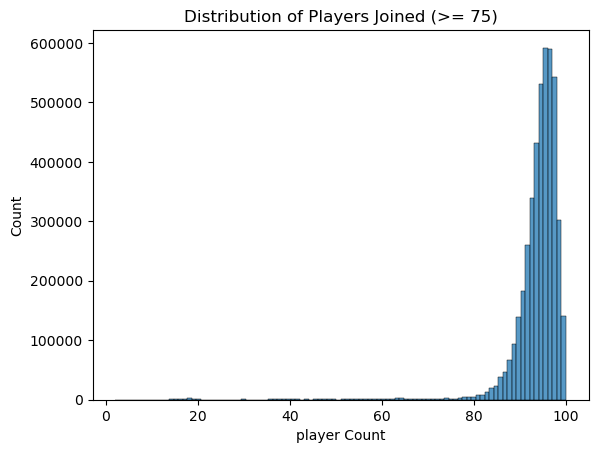

In [11]:
filtered_data = df[df['playerCount'] >= 0]
sns.histplot(filtered_data['playerCount'], bins=100)  
plt.xlabel('player Count')
plt.ylabel('Count')
plt.title('Distribution of Players Joined (>= 75)')
plt.show()

This distribution indicates that most matches have more than 75 players. Additionally, the distribution of the playerCount feature is left-skewed.

## understand the data:

#### Kills without moving :

In the dataset, we create a new feature called 'totalDistance' by combining swimDistance, walkDistance, and rideDistance. If a player has a kill >=0 without any movement, it indicates that they may be using a cheat code or mod. We do not want to train our model on such instances, so our goal is to identify and remove these entries from the dataset.

In [12]:
df['totalDistance']=df['swimDistance']+df['rideDistance']+df['walkDistance']

In [13]:
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [14]:
df[df['killswithoutMoving']==True].shape

(1535, 32)

In [15]:
df[df['killswithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerCount,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [16]:
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

In [17]:
df[df['killswithoutMoving']==True].shape

(0, 32)

### Road kills:

Kills by moving vehicles are very rare and challenging to achieve. Therefore, we will drop those cases

In [18]:
df.drop(df[df['roadKills']>5].index,inplace=True)

### How many kills:

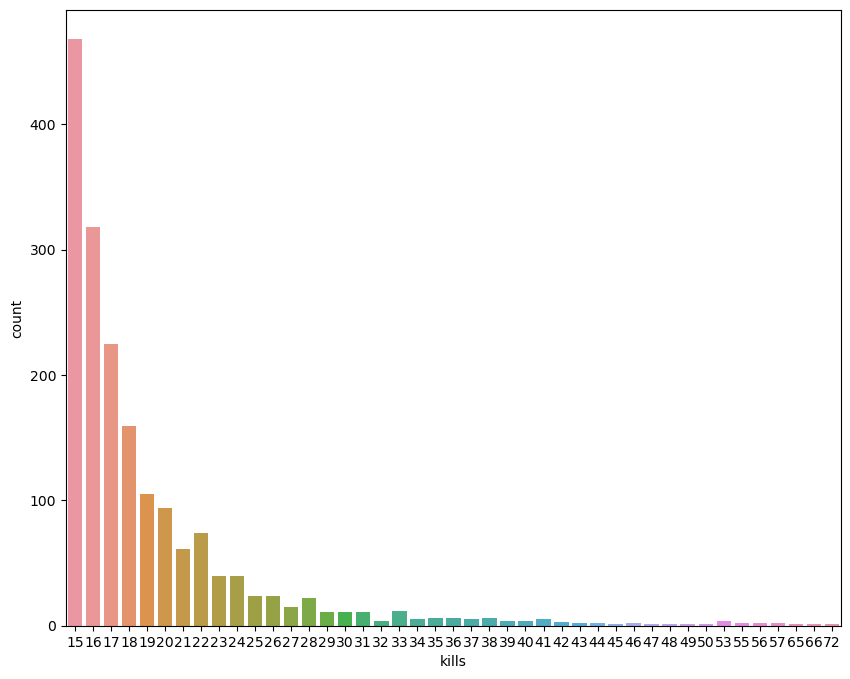

In [19]:
df1=df[df['kills']>=15]
plt.figure(figsize=(10, 8))
sns.countplot(data=df1,x=df1['kills'])
plt.show()

It's really very difficult to kill more than 20+ in a single match. So, I will remove all those kills >20

In [20]:
df.drop(df[df['kills']>20].index,inplace=True)

### Head Shot rate:

In [21]:
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

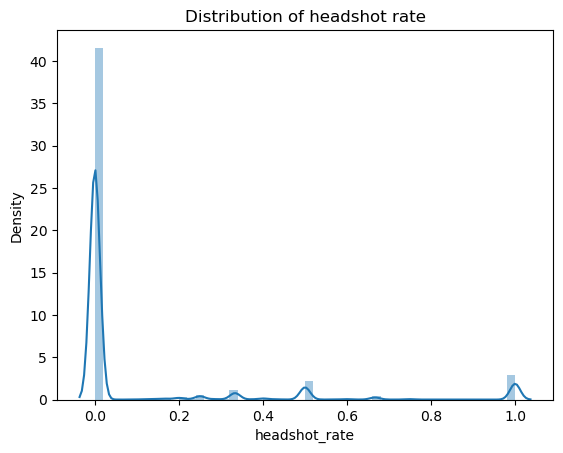

In [22]:
warnings.filterwarnings("ignore")

sns.distplot(df['headshot_rate'])
plt.title('Distribution of headshot rate')
plt.show()

Its very rare that player's head shot rate is 1 and all total kills are >5. So, we drop this rows.

In [23]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape


(187, 33)

In [24]:
df.drop(df[(df['headshot_rate'] ==1) & (df['kills']>5)].index,inplace=True)

In [25]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4444780 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

### Longest Kill :

In [ ]:
warnings.filterwarnings("ignore")

sns.distplot(df['longestKill'])
plt.title('Longest short Distribution plot')
plt.show()

In [ ]:
df[df['longestKill']>500].shape

In [ ]:
df.drop(df[df['longestKill']>500].index,inplace=True)

In [ ]:
df.info()

### EDA :

In [ ]:
## Check the dataset shape
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
temp=df.drop(columns=['Id','groupId','matchId'])

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

# Set the size of the figure
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [ ]:
numeric_df.corr()

## Feature Engineering :

In [ ]:
df.info()

In [ ]:
normalising_factor = (100 - df['playerCount']/100)+1

In [ ]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor

In [ ]:
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [ ]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [ ]:
data.head(2)

In [ ]:
data.columns

## ML-Catboost Model:

### split the input an target columns

In [ ]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [ ]:
x.info()

### Handeling the categorical data

In [ ]:
x1=x[['matchType','killswithoutMoving']]

In [ ]:
x1=pd.get_dummies(x1,columns=['matchType','killswithoutMoving'],dtype=int)

In [ ]:
x2=x.drop(columns=['matchType','killswithoutMoving'])

In [ ]:
org=pd.concat([x1,x2],axis=1)

In [ ]:
org.head()

### Scaling the data :

In [ ]:
sc=StandardScaler()
sc.fit(org)
x=pd.DataFrame(sc.transform(org))

In [ ]:
x.head()

### splitting the data:

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print('shape of train data :',xtrain.shape,ytrain.shape)
print('shape of test data :',xtest.shape,ytest.shape)

### Model train:

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
model=XGBRegressor()
model.fit(xtrain,ytrain)

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
r2_score(ytest,y_pred)

### Hyper parameter Tuning :

In [ ]:
In this method we 